# Talking to CSV and Excel files with LangChain

In [ ]:
!pip -q install langchain openai
!pip show langchain
!pip install langchain_experimental
!pip install langchain_google_genai

## Dataset - wiki_movie_plots_deduped

In [ ]:
import pandas as pd
path="./wiki_movie_plots_deduped.csv"
df = pd.read_csv(path)

In [ ]:
df.head(50)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,tokenized_plot,plot_length,unique_words
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...","[A, bartender, is, working, at, a, saloon, ,, ...",500,67
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...","[The, moon, ,, painted, with, a, smiling, face...",437,65
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...","[The, film, ,, just, over, a, minute, long, ,,...",436,59
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,"[Lasting, just, 61, seconds, and, consisting, ...",890,106
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"[The, earliest, known, adaptation, of, the, cl...",732,91
5,1903,Alice in Wonderland,American,Cecil Hepworth,May Clark,unknown,https://en.wikipedia.org/wiki/Alice_in_Wonderl...,"Alice follows a large white rabbit down a ""Rab...","[Alice, follows, a, large, white, rabbit, down...",1257,136
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...,"[The, film, opens, with, two, bandits, breakin...",1371,142
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...,"[The, film, is, about, a, family, who, move, t...",181,31
8,1905,The Little Train Robbery,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Little_Train...,The opening scene shows the interior of the ro...,"[The, opening, scene, shows, the, interior, of...",3625,307
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....,"[Scenes, are, introduced, using, lines, of, th...",487,66


In [ ]:
df.describe()

,Release Year,plot_length
count,34886.000000,34886.000000
mean,1981.314252,2165.034541
std,27.815174,1817.325247
min,1901.000000,15.000000
25%,1957.000000,716.000000
50%,1988.000000,1656.000000
75%,2007.000000,3376.000000
max,2017.000000,36773.000000


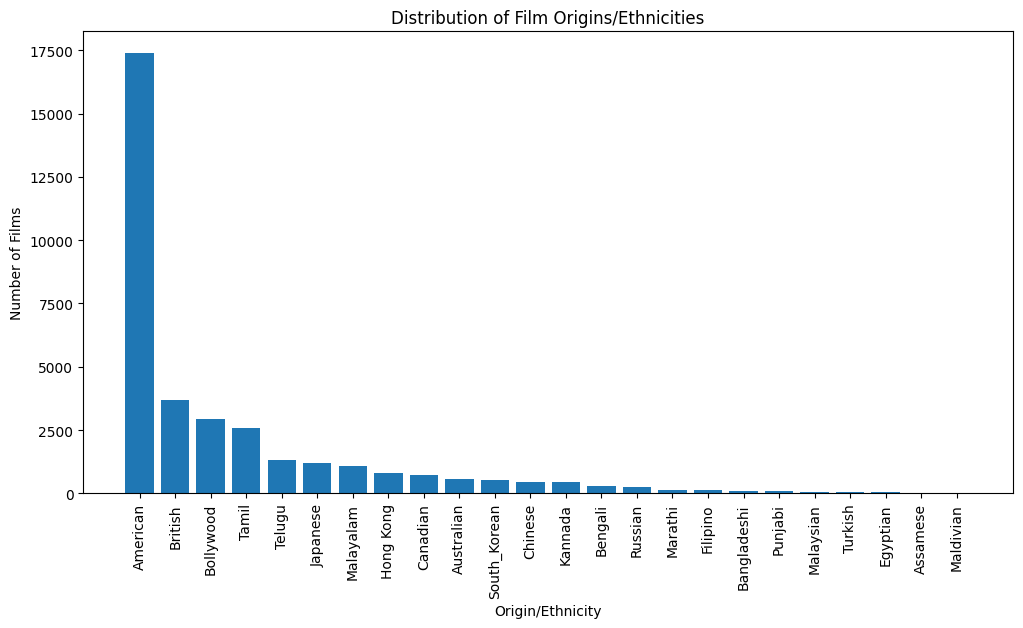

In [ ]:
# @title Distribution of Film Origins/Ethnicities

import matplotlib.pyplot as plt

df_grouped = df['Origin/Ethnicity'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(df_grouped.index, df_grouped.values)
plt.xlabel('Origin/Ethnicity')
plt.ylabel('Number of Films')
plt.title('Distribution of Film Origins/Ethnicities')
_ = plt.xticks(rotation=90)


# **plot distribution of movie release years**

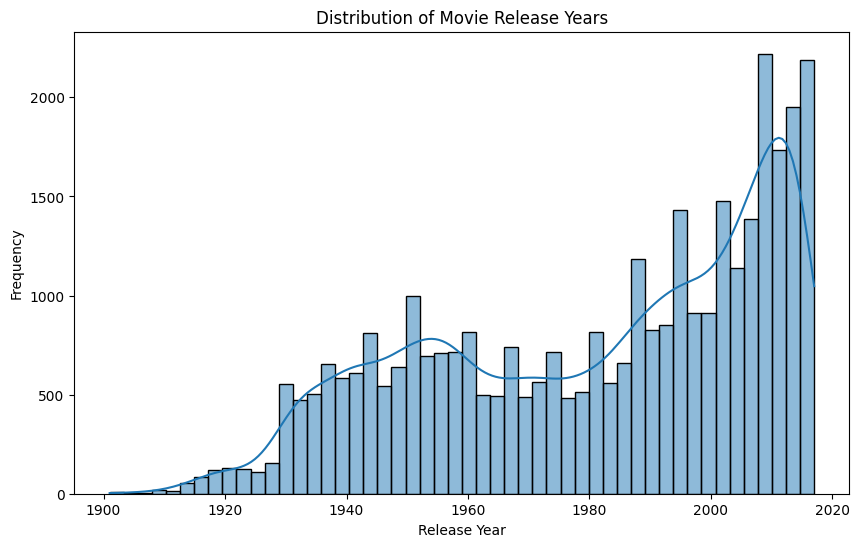

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Release Year'].dropna(), bins=50, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

**Tokenize the plot descriptions**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')

# Tokenize the plot descriptions
df['tokenized_plot'] = df['Plot'].apply(word_tokenize)

# Build TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Plot'])

# Show the first few tokenized plots and TF-IDF feature shape
df[['Title', 'tokenized_plot']].head(), tfidf_matrix.shape


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


(                              Title  \
 0            Kansas Saloon Smashers   
 1     Love by the Light of the Moon   
 2           The Martyred Presidents   
 3  Terrible Teddy, the Grizzly King   
 4            Jack and the Beanstalk   
 
                                       tokenized_plot  
 0  [A, bartender, is, working, at, a, saloon, ,, ...  
 1  [The, moon, ,, painted, with, a, smiling, face...  
 2  [The, film, ,, just, over, a, minute, long, ,,...  
 3  [Lasting, just, 61, seconds, and, consisting, ...  
 4  [The, earliest, known, adaptation, of, the, cl...  ,
 (34886, 133554))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Plot'])


In [ ]:
print(tfidf_matrix.shape)


(34886, 133554)


#Check for missing values

In [ ]:
print(df.isnull().sum())
# Example: Fill missing 'Release Year' with the median
df['Release Year'].fillna(df['Release Year'].median(), inplace=True)

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
plot_length            0
dtype: int64


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
df['tokenized_plot'] = df['Plot'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Calculate plot length
df['plot_length'] = df['Plot'].apply(len)

# Calculate number of unique words
df['unique_words'] = df['tokenized_plot'].apply(lambda x: len(set(x)))

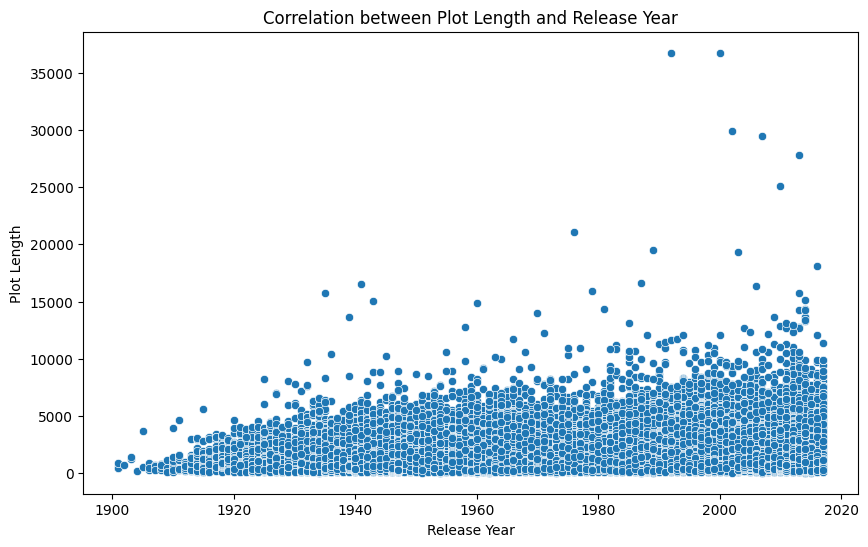

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate plot length if it doesn't exist in df
if 'plot_length' not in df.columns:
    df['plot_length'] = df['Plot'].apply(len)  # Calculate and assign to df


# Correlation between plot length and release year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Release Year', y='plot_length', data=df)  # Now df has 'plot_length'
plt.title('Correlation between Plot Length and Release Year')
plt.xlabel('Release Year')
plt.ylabel('Plot Length')
plt.show()

##**Building A Natural Language Enabled Pandas Dataframe Agent With LangChain & Gemini**

*   Data-Driven Insights into Movie Plots and Characteristics
* Building a Movie Information Retrieval Engine with LangChain
* LangChain for Movie Data Analysis and Visualization
* Interactive Movie Exploration using LangChain Agents


/usr/local/lib/python3.10/dist-packages/langchain_experimental/agents/agent_toolkits/pandas/base.py:282: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(




> Entering new AgentExecutor chain...
Thought: I should use the `plot` function of the dataframe to plot the top 5 movie titles in a bar chart.
Action: python_repl_ast
Action Input: df.head(5).plot(kind='bar', x='Title', y='Release Year')Axes(0.125,0.11;0.775x0.77)Final Answer: I have plotted the top 5 movie titles in a bar chart with the x-axis as the movie title and the y-axis as the release year.

> Finished chain.


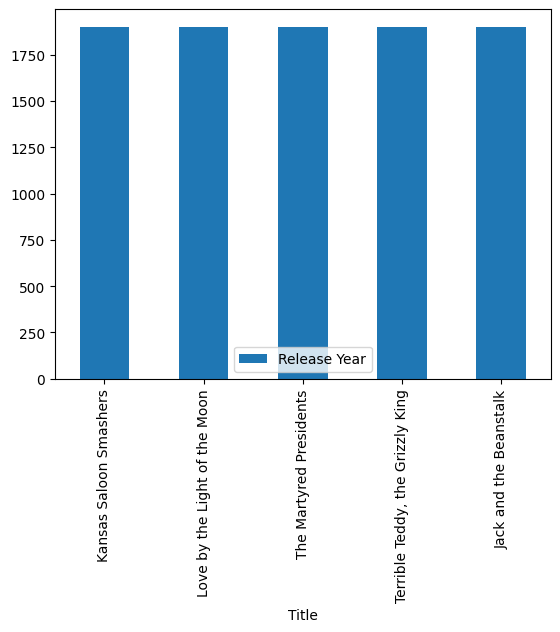

In [ ]:
import os
from langchain_experimental.agents import create_csv_agent
from langchain_community.llms import Together
from langchain.schema.runnable import RunnablePassthrough
from langchain.prompts import ChatPromptTemplate,PromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents import create_pandas_dataframe_agent
import pandas as pd
from langchain_google_genai import GoogleGenerativeAI
from langchain_google_genai.chat_models import ChatGoogleGenerativeAI
import os
def make_llm(text,path):
  """
  Create a LLM with the Together model.
  """
  api_key = os.getenv("GOOGLE_API_KEY")
  llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=api_key, temperature=0.2)

  df=pd.read_csv("/content/wiki_movie_plots_deduped.csv")
  agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    allow_dangerous_code=True,
    agent_type="zero-shot-react-description",
    handle_parsing_errors=True
)
  agent.invoke(text)
context="""plot top 5 movies titles in bar chart"""
make_llm(context,path)

## ASK the Query for show the data plots

/usr/local/lib/python3.10/dist-packages/langchain_experimental/agents/agent_toolkits/pandas/base.py:282: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(




> Entering new AgentExecutor chain...
Thought: I should first filter the dataframe to only include movies with Origin/Ethnicity as American, then group the movies by Release Year and count the number of movies in each year.
Action: python_repl_ast
Action Input: df[df['Origin/Ethnicity'] == 'American'].groupby('Release Year').count()              Title  Origin/Ethnicity  Director  Cast  Genre  Wiki Page  Plot
Release Year                                                                 
1901              4                 4         4     0      4          4     4
1902              1                 1         1     0      1          1     1
1903              2                 2         2     1      2          2     2
1904              1                 1         1     0      1          1     1
1905              2                 2         2     0      2          2     2
...             ...               ...       ...   ...    ...        ...   ...
2013            313               313   

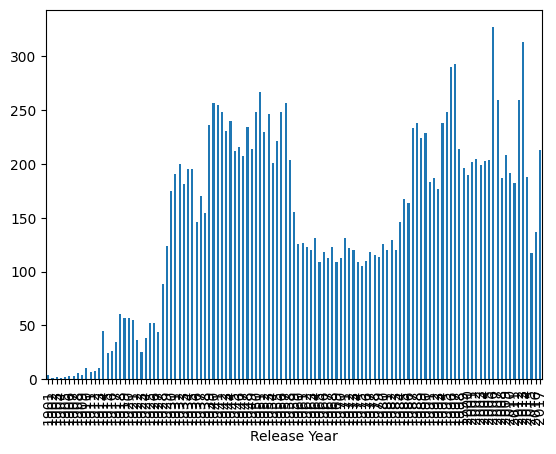

In [ ]:
query="""plot Origin movies in year wise in bar chart"""
make_llm(query)